# Classical machine learning

label       int64
title      object
text       object
subject    object
date       object
dtype: object (39942, 5)


,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


label      0
title      0
text       0
subject    0
date       0
dtype: int64
Unique label values: [1 0]
Unique subject values: ['politicsNews' 'worldnews' 'News' 'politics' 'Government News'
 'left-news']
Empty titles: 0
Empty texts: 610
Empty subjects: 0
Empty dates: 0
Duplicated entries: 3513


(35989, 4)

,label,subject,title_text,year,month,day
0,1,4,"As U.S. budget fight looms, Republicans flip t...",2017,12,31
1,1,4,U.S. military to accept transgender recruits o...,2017,12,29
2,1,4,Senior U.S. Republican senator: 'Let Mr. Muell...,2017,12,31
3,1,4,FBI Russia probe helped by Australian diplomat...,2017,12,30
4,1,4,Trump wants Postal Service to charge 'much mor...,2017,12,29


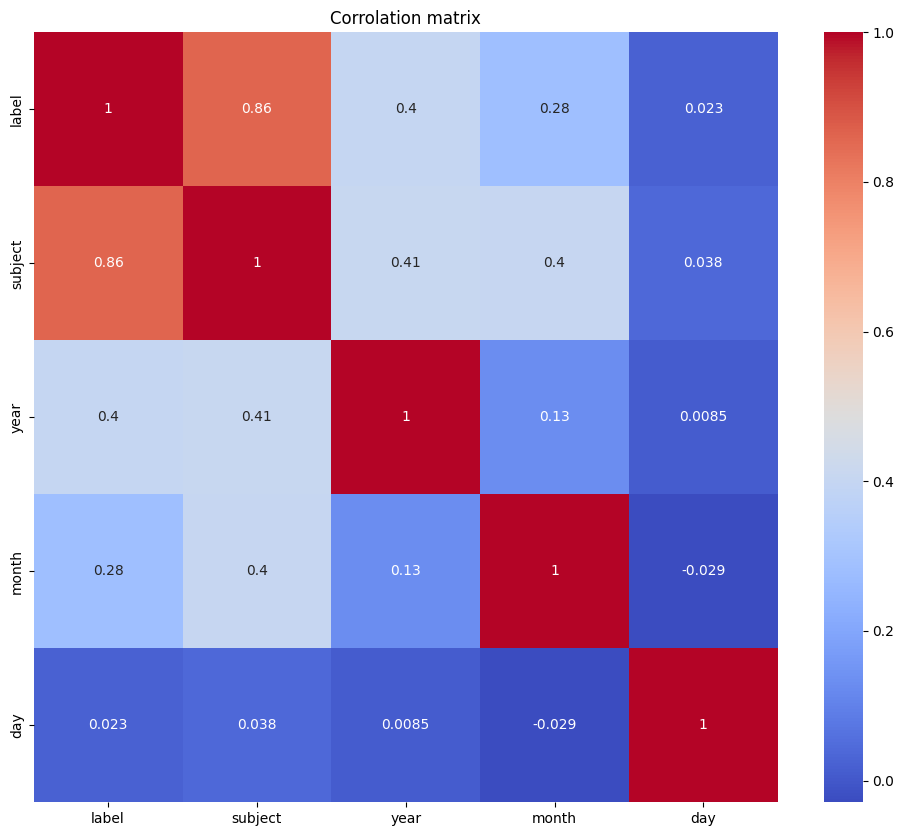

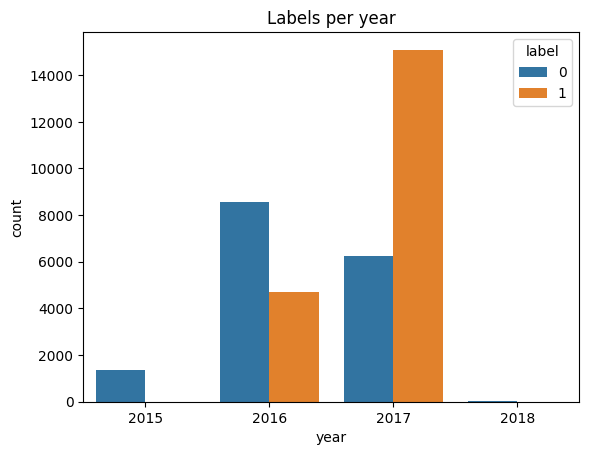

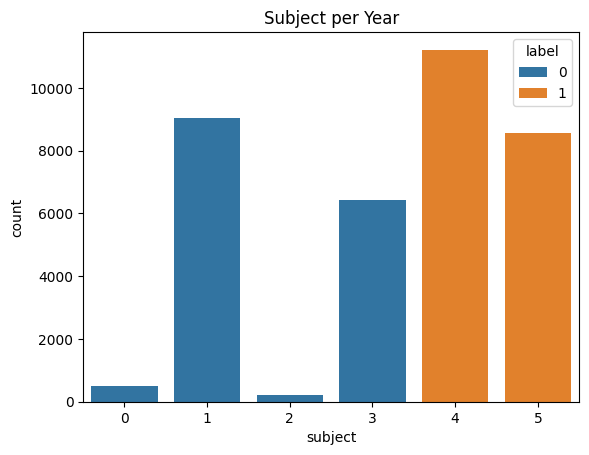

(34572, 5)

label
1    19788
0    14784
Name: count, dtype: int64


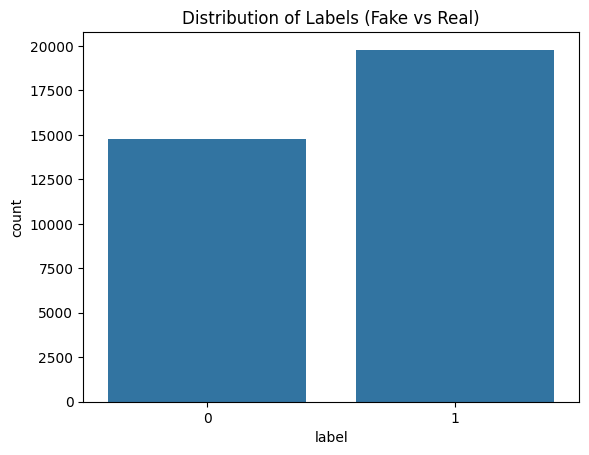

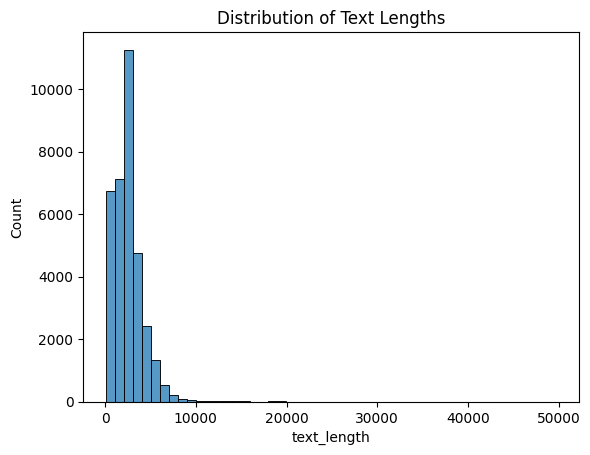

In [11]:
# import and run all cells of the preprocessing file

import nbformat
from IPython.core.interactiveshell import InteractiveShell

with open('preprocessing.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

shell = InteractiveShell.instance()
for cell in nb.cells:
    if cell.cell_type == 'code':
        shell.run_cell(cell.source)

## Feature extraction

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_text = vectorizer.fit_transform(X_train["title_text"])
X_test_text = vectorizer.transform(X_test["title_text"])

X_train_meta = X_train.drop(columns=["title_text"])
X_test_meta = X_test.drop(columns=["title_text"])

bool_cols = X_train_meta.select_dtypes(include='bool').columns
X_train_meta[bool_cols] = X_train_meta[bool_cols].astype(int)

bool_cols = X_test_meta.select_dtypes(include='bool').columns
X_test_meta[bool_cols] = X_test_meta[bool_cols].astype(int)

X_train_meta_sparse = csr_matrix(X_train_meta.values)
X_test_meta_sparse = csr_matrix(X_test_meta.values)

# Combine features
X_train_final = hstack([X_train_text, X_train_meta_sparse])
X_test_final = hstack([X_test_text, X_test_meta_sparse])

## Model training

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logr_model = LogisticRegression()
logr_model.fit(X_train_final, y_train)

y_pred = logr_model.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.45958062183658716

Classification Report:
               precision    recall  f1-score   support

           0       0.45      1.00      0.62      3001
           1       0.99      0.05      0.09      3914

    accuracy                           0.46      6915
   macro avg       0.72      0.52      0.35      6915
weighted avg       0.76      0.46      0.32      6915


Confusion Matrix:
 [[3000    1]
 [3736  178]]


### Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train_final, y_train)

y_pred = rf_model.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7073029645697758

Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75      3001
           1       1.00      0.48      0.65      3914

    accuracy                           0.71      6915
   macro avg       0.80      0.74      0.70      6915
weighted avg       0.83      0.71      0.69      6915


Confusion Matrix:
 [[3001    0]
 [2024 1890]]


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = LinearSVC(class_weight='balanced', random_state=42, max_iter=10000)
svm_model.fit(X_train_text, y_train)

y_pred = svm_model.predict(X_test_text)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


### Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB

mnb_model = MultinomialNB()
mnb_model.fit(X_train_final, y_train)

y_pred = mnb_model.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5660159074475777

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      3001
           1       0.57      1.00      0.72      3914

    accuracy                           0.57      6915
   macro avg       0.28      0.50      0.36      6915
weighted avg       0.32      0.57      0.41      6915


Confusion Matrix:
 [[   0 3001]
 [   0 3914]]


/Users/benpaffrath/.pyenv/versions/3.12.10/envs/ironhack/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/benpaffrath/.pyenv/versions/3.12.10/envs/ironhack/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/benpaffrath/.pyenv/versions/3.12.10/envs/ironhack/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

### Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9133767172812726

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      3001
           1       1.00      0.85      0.92      3914

    accuracy                           0.91      6915
   macro avg       0.92      0.92      0.91      6915
weighted avg       0.93      0.91      0.91      6915


Confusion Matrix:
 [[2993    8]
 [ 591 3323]]


### XGBoost

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = XGBClassifier(eval_metric='logloss', n_estimators=100, learning_rate=0.1, n_jobs=-1)
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9865509761388286

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3001
           1       1.00      0.98      0.99      3914

    accuracy                           0.99      6915
   macro avg       0.99      0.99      0.99      6915
weighted avg       0.99      0.99      0.99      6915


Confusion Matrix:
 [[2993    8]
 [  85 3829]]
